# Airline

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data['Total_Stops'].isnull().sum()

1

In [8]:
#Show the record that contains null in total stop feature
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace= True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Preprocessing

In [11]:
data=train_data.copy()

In [12]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
data.dtypes 

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
# create a function that will split the date into day month and year
def change_into_datetime(col):
    data[col]=pd.to_datetime(col)
    

In [15]:
def change_into_string(col):
    data[col]=str(col)

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [18]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [19]:
def change_into_date_time(col):
    data[col]=pd.to_datetime(data[col])    

In [20]:
for features in ['Dep_Time','Arrival_Time']:
    change_into_date_time(features)

In [21]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [23]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [24]:
# Min and max year are 2019

In [25]:
# Extract the day and store it in a new column
data['Day']=data['Date_of_Journey'].dt.day

In [26]:
# Extract the month and store it in a new column
data['Month']=data['Date_of_Journey'].dt.month

In [27]:
# Extract the year and store it in a new column
data['Year']=data['Date_of_Journey'].dt.year

In [28]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-15 05:50:00,2022-09-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [29]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Day                         int64
Month                       int64
Year                        int64
dtype: object

In [30]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
dtype: int64

In [31]:
# Drop Date_of_Journey because it has been already split into day month and year
data.drop('Date_of_Journey',axis=1,inplace=True)

In [32]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-15 05:50:00,2022-09-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [33]:
# Clean the Dep_time and Arrival_Time and featurize it

In [34]:
def extract_hour_min(df,col):
    df[col+'_Hour']=df[col].dt.hour
    df[col+'_Minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    

In [35]:
extract_hour_min(data,'Dep_Time') # Extract hour and min

In [36]:
extract_hour_min(data,'Arrival_Time') # Extract hour and min

In [37]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### When most of the flights take off ?

In [38]:
data['Dep_Time_Hour'].mode()

0    9
dtype: int64

In [39]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return'Early morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return 'Noon'
    elif(x>16) and(x<=20):
        return 'Evening'
    elif(x>20) and(x<=24):
        return'Late night'

In [40]:
data['Dep_Time_Hour'].apply(flight_dep_time)

0           Late night
1        Early morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early morning
10681          Morning
10682          Morning
Name: Dep_Time_Hour, Length: 10682, dtype: object

In [41]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts()

Early morning    2880
Evening          2357
Morning          2209
Noon             1731
Late night       1040
Name: Dep_Time_Hour, dtype: int64

<AxesSubplot:>

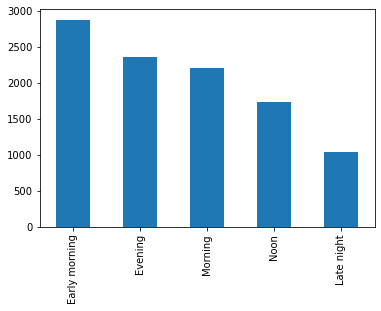

In [42]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Dep_Time_Hour'>

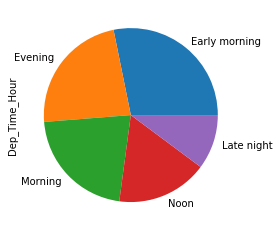

In [43]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='pie')

<AxesSubplot:>

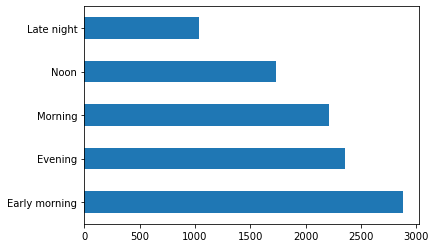

In [44]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='barh')

## Cufflinks & plotly

In [45]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot


In [46]:
cf.go_offline()

In [47]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

## Preprocess duration feature and extract meaningful features.

In [48]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [49]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [50]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [51]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [52]:
data['Duration'][0].split(' ')[0]

'2h'

In [54]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [55]:
data['Duration'][0].split(' ')[1]

'50m'

In [56]:
data['Duration'][0].split(' ')[1][0:-1]

'50'

In [60]:
# Split the time into hours and mins withou (h , m) 
data['Duration_hour']=data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[0][0:-1]))

In [61]:
data['Duration_min']=data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[1][0:-1]))

In [62]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,50


### Does duration affect price or not ?

In [63]:
# To calculate the total mins
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

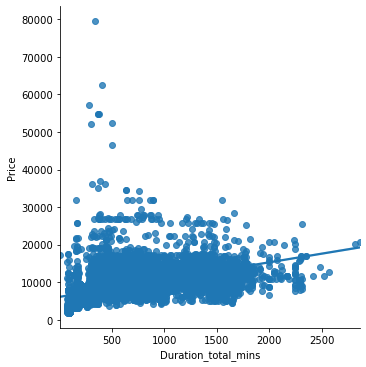

In [64]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)
#As the Duration_total_mins increases Flight price also increases.

### Which city has the maximum final destination of flights?

In [65]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

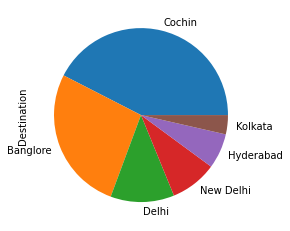

In [66]:
data['Destination'].value_counts().plot(kind='pie')

In [67]:
# Majority is Cochin
# Delhi has two values that needs to be corrected

## EDA 

In [68]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [69]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## Airline VS Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

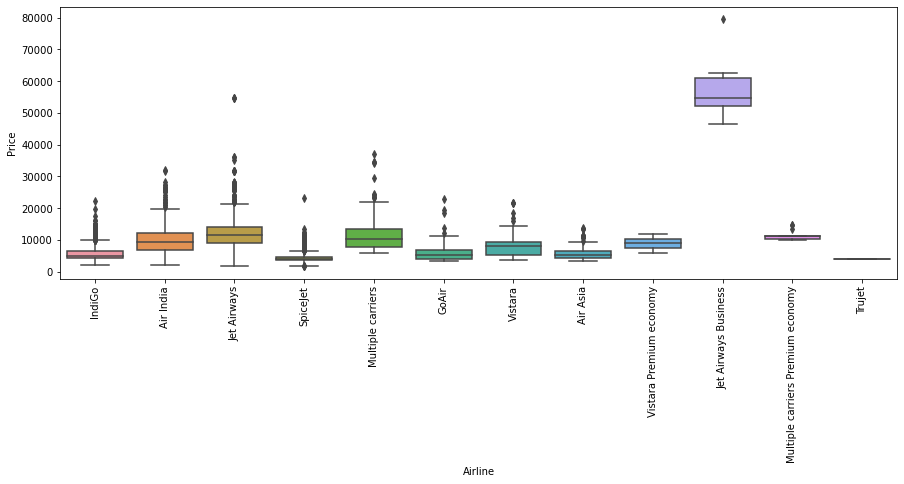

In [70]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

## Jet Airways Business have the highest Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

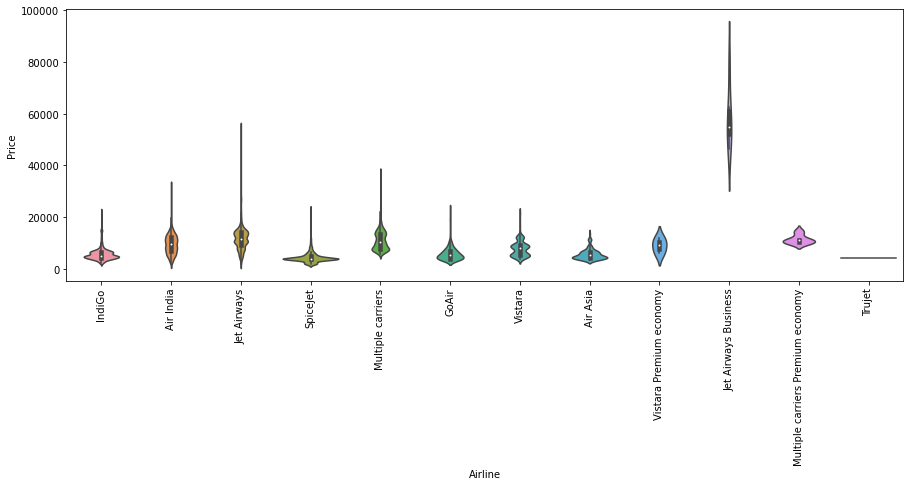

In [71]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

## Feature encoding One hot encoding

In [65]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Minute', 'Arrival_Time_Hour', 'Arrival_Time_Minute',
       'Duration_hour', 'Duration_min'],
      dtype='object')

In [72]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2) 
# most instances has no info
# to calculate percentage of data /len(data)*100
#np.round to round it to two decimal 

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
Red-eye flight                   0.01
2 Long layover                   0.01
1 Short layover                  0.01
Name: Additional_Info, dtype: float64

In [73]:
#Dropping unnecessary features
#most of the instances in the column additional info is null you may consider dropping the table
data.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

In [74]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Day', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_hour',
       'Duration_min', 'Duration_total_mins'],
      dtype='object')

In [75]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,2019,5,50,13,15,2,50,445
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,2019,9,25,4,25,2,50,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,2019,18,5,23,30,2,50,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,2019,16,50,21,35,2,50,285


## Seperate categorical and numerical features

In [76]:
# to display the categorical columns
cat_col=[col for col in data.columns if data[col].dtype =='object']

In [77]:
# to display the numerical columns

num_col=[col for col in data.columns if data[col].dtype !='object']

In [78]:
data['Source'].unique() 
# the model doesnt understand this object values so we have to apply the feature encoding on these categories

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [79]:
# nominal data----> one hot encoding
# we have a special function in sklearn
# this is one hot encoding
# Source      f1     f2     f3    f4
# Banglore    1      0      0     0
# Delhi       0      1      0     0
# Chennai     0      0      1     0
# Mumbai      0      0      0     1

## Implementing encoding from scratch

In [80]:
data['Source'].apply(lambda x: 1 if 'Banglore' else 0)

0        1
1        1
2        1
3        1
4        1
        ..
10678    1
10679    1
10680    1
10681    1
10682    1
Name: Source, Length: 10682, dtype: int64

In [83]:
for category in data['Source'].unique():
    data['Source_' + category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [85]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time_Hour,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,2019,5,...,13,15,2,50,445,0,1,0,0,0


 It is impossible to do manually when i have 1000 cities. <br> It will increase storage usage. <br> Therefor i need other techniques like target guided encoding.


## Target guided encoding 

In [86]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [87]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [88]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [89]:
#Creating a dictionary that will hold values for airlines
{key:index for index, key in enumerate(airlines,0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [90]:
dict1 = {key:index for index, key in enumerate(airlines,0)}

In [92]:
# Now we have to map this dictionary to the original values of airlines

In [93]:
data['Airline']=data['Airline'].map(dict1)

In [94]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [95]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time_Hour,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,2019,5,...,13,15,2,50,445,0,1,0,0,0


In [96]:
data['Destination'].unique() # replace newdelhi with delhi

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [97]:
# Replace New Delhi with Delhi
data['Destination'].replace(to_replace='New Delhi',value='Delhi',inplace=True)

In [98]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [99]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [100]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [101]:
dict2 = {key:index for index, key in enumerate(dest,0)}

In [102]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [103]:
data['Destination']=data['Destination'].map(dict2)

In [104]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [105]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time_Hour,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,2019,22,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,2019,5,...,13,15,2,50,445,0,1,0,0,0


## Perform manual encoding on Total_Stops feature

In [106]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [107]:
data['Total_Stops'].replace('non-stop',0, inplace=True)
data['Total_Stops'].replace('2 stops',2, inplace=True)
data['Total_Stops'].replace('1 stop',1, inplace=True)
data['Total_Stops'].replace('3 stops',3, inplace=True)
data['Total_Stops'].replace('4 stops',4, inplace=True)
# Or use the dictionary 
# stops ={'non-stop':0,'2 stops':2, '3 stops':3, '4 stops':4}
# then map data['Total_Stops'].map(stops)

In [108]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

## Outlier detection

 Outlier detection <br>
 How to deal with outliers <br>
 Distribution plot to detect outliers <br> 
 Histograms to detect outliers<br>
 Box plot to detect outliers 

In [109]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



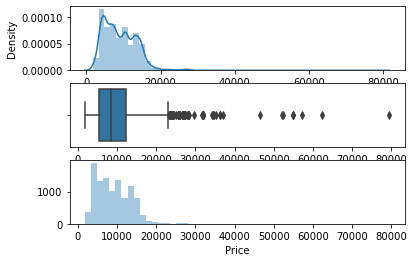

In [110]:
plot(data,'Price')

The long tail here is my outlier <br>
How to deal with it we can replace the values above 35 k with median price value we cant use mean because it badly affets outliers <br>
The mean of 2,8,4,6,7 --> almost 5 <br>
The mean of 2,8,4,6,3,1000 --> almost 170 we cant use mean for outliers


In [111]:
#Replace values above 35k with median
np.where(data['Price']>= 35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [112]:
data['Price']=np.where(data['Price']>= 35000,data['Price'].median(),data['Price'])

C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



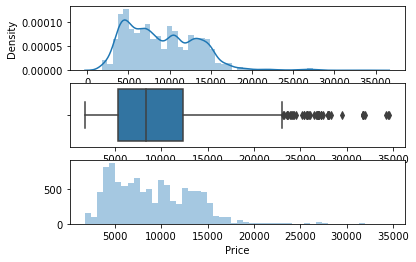

In [113]:
plot(data,'Price')

## Features selection 

In [118]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,2019,5,50,13,15,2,50,0,1,0,0,0


In [114]:
# source feature already hot encoded , Duration feature already featured as duration hour and duration min remove source and duration 

In [115]:
data.drop(columns=['Source','Duration'],axis=1,inplace = True)

In [116]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Day,Month,Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,5,1,2019,5,50,13,15,2,50,445,0,1,0,0,0


In [117]:
data.dtypes # all numerical data now int64 and float64

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Day                      int64
Month                    int64
Year                     int64
Dep_Time_Hour            int64
Dep_Time_Minute          int64
Arrival_Time_Hour        int64
Arrival_Time_Minute      int64
Duration_hour            int64
Duration_min             int64
Duration_total_mins      int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [118]:
from sklearn.feature_selection import mutual_info_regression

In [121]:
# Price depends on all other features , the rest are independent features
# store them into two seperate variables
X= data.drop(['Price'],axis =1)
y = data['Price']

In [122]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Day                    int64
Month                  int64
Year                   int64
Dep_Time_Hour          int64
Dep_Time_Minute        int64
Arrival_Time_Hour      int64
Arrival_Time_Minute    int64
Duration_hour          int64
Duration_min           int64
Duration_total_mins    int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [123]:
mutual_info_regression(X,y)

array([9.73079777e-01, 1.00232668e+00, 7.86082297e-01, 1.86788024e-01,
       2.44744774e-01, 1.07597013e-02, 3.37312588e-01, 2.69175506e-01,
       4.02653377e-01, 3.46404610e-01, 0.00000000e+00, 2.11784265e-04,
       4.93152039e-01, 3.92763616e-01, 4.57916088e-01, 5.22930131e-01,
       1.21614149e-01, 1.98905359e-01])

In [124]:
imp = pd.DataFrame(mutual_info_regression(X,y),index=X.columns )
imp.columns=['importance']

In [125]:
imp

,importance
Airline,0.979846
Destination,1.009030
Total_Stops,0.788012
Day,0.189127
Month,0.245806
Year,0.000000
Dep_Time_Hour,0.341460
Dep_Time_Minute,0.257449
Arrival_Time_Hour,0.397866
Arrival_Time_Minute,0.348393


In [127]:
# The higher the importance the higher the dependencies
imp.sort_values(by='importance',ascending = False)

,importance
Destination,1.009030
Airline,0.979846
Total_Stops,0.788012
Source_Delhi,0.519836
Duration_total_mins,0.500239
Source_Kolkata,0.458666
Arrival_Time_Hour,0.397866
Source_Banglore,0.383799
Arrival_Time_Minute,0.348393
Dep_Time_Hour,0.341460


## Building the model

In [128]:
# Splitting into train and test.
# 75 % train 25 % test 
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
ml_model = RandomForestRegressor()

In [132]:
model=ml_model.fit(X_train,y_train)

In [133]:
y_pred=model.predict(X_test)

In [134]:
y_pred

array([16594.63,  6026.43,  8908.81, ...,  3545.05,  6277.02,  7553.15])

In [135]:
y_pred.shape

(2671,)

In [136]:
len(X_test)

2671

## Save model

In [139]:
#!pip install pickle-mixin

In [140]:
import pickle

In [141]:
file=open(r'PATH','wb')

In [142]:
pickle.dump(model,file)

In [143]:
model=open(r'PATH','rb')

In [144]:
forest=pickle.load(model)

In [145]:
forest.predict(X_test)

array([16594.63,  6026.43,  8908.81, ...,  3545.05,  6277.02,  7553.15])

## Define evaluation metric

In [146]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [147]:
mape(y_test,forest.predict(X_test))

13.09347339788823

## Automate ML pipeline

In [148]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9513951916234938
Predictions are : [16725.2   6034.14  8933.69 ...  3530.89  6439.02  7346.45]


r2_score: 0.8134252701411886
MSE :  3632162.1485771155
MAE :  1169.8863319769066
RMSE :  1905.8232207046685
MAPE :  13.15700426801428


C:\Users\bojj10062\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



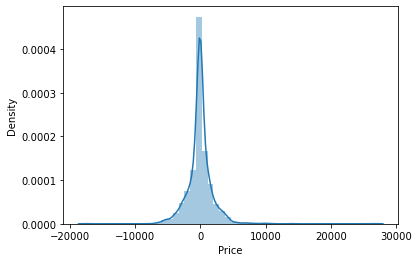

In [149]:
# Random Forest
predict(RandomForestRegressor())

## Hypertune ML model

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
reg_rf=RandomForestRegressor()

In [152]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [153]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [154]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [155]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [156]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [157]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [158]:
#To get your best model.
rf_Random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [159]:
pred2=rf_Random.predict(X_test)

In [160]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8335131089286995